In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

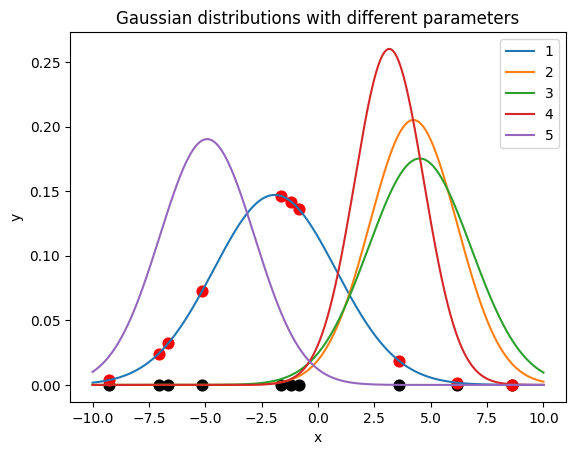

In [92]:
num_distributions = 5
num_x_n = 10
num_scatter_distribution = 1

mean_values = np.random.uniform(low=-5, high=5, size=num_distributions)
std_values = np.random.uniform(low=1.0, high=3.0, size=num_distributions)

x = np.linspace(-10, 10, 1000)
x_p = np.random.uniform(low=-10, high=10, size=num_x_n)

data = {'mean': [], 'std': [], 'Likelihood(1.53)': [], 'Log Likelihood(1.54)': []}
data_x = {'x_n':[]}

for i in range(num_distributions):
    y = 1/(std_values[i]*np.sqrt(2*np.pi))*np.exp(-(x-mean_values[i])**2/(2*std_values[i]**2))
    y_p = 1/(std_values[i]*np.sqrt(2*np.pi))*np.exp(-(x_p-mean_values[i])**2/(2*std_values[i]**2))
    if i == num_scatter_distribution -1:
        y_scatter = y_p
    
    data['mean'].extend([mean_values[i]])
    data['std'].extend([std_values[i]])
    
    plt.plot(x, y, label=f'{i+1}')
    data['Likelihood(1.53)'].extend([np.prod(y_p)]) #アンダーフローの例
    data['Log Likelihood(1.54)'].extend([np.sum(np.log(y_p))])

plt.title('Gaussian distributions with different parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_p, np.zeros(num_x_n), s=60, c="black")
plt.scatter(x_p,y_scatter, s=60, c="red")
plt.legend()
plt.show()

In [93]:
df = pd.DataFrame(data, index = np.arange(1, num_distributions + 1))
print(df)

data_x['x_n'] = x_p
print(pd.DataFrame(data_x, index = np.arange(1, num_x_n + 1)))

       mean       std  Likelihood(1.53)  Log Likelihood(1.54)
1 -1.919329  2.711456      1.540886e-18            -41.014174
2  4.230498  1.944776      1.062272e-43            -98.950749
3  4.511731  2.275392      5.287388e-36            -81.227739
4  3.159695  1.533364      1.141511e-54           -124.207242
5 -4.919167  2.095967      5.739685e-30            -67.330148
         x_n
1  -7.066841
2   3.574615
3  -0.861633
4  -1.179538
5  -9.269984
6  -1.623831
7  -5.133738
8   6.172935
9  -6.647187
10  8.599491
